In [1]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Title & Introduction
print("Project Title: Predicting Student Performance in Exams using Classification Models")
print("Objective: Predict whether a student passes or fails based on demographic and exam features. This uses classification models on the provided StudentsPerformance.csv dataset.")
print("Focus: Data cleaning, EDA, and predictive modeling.")

Project Title: Predicting Student Performance in Exams using Classification Models
Objective: Predict whether a student passes or fails based on demographic and exam features. This uses classification models on the provided StudentsPerformance.csv dataset.
Focus: Data cleaning, EDA, and predictive modeling.


In [3]:
# Data Loading
# Upload the file manually in Colab
from google.colab import files
uploaded = files.upload()  # Upload 'StudentsPerformance.csv' from your local machine
df = pd.read_csv('StudentsPerformance.csv')

# Display first few rows
print("Dataset Shape:", df.shape)
print(df.head())

Saving StudentsPerformance.csv to StudentsPerformance.csv
Dataset Shape: (1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
# Data Cleaning & Preprocessing
print("Original Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any; this dataset is clean, but general approach)
df.dropna(inplace=True)  # Drop rows with NaN

# Check for duplicates
df.drop_duplicates(inplace=True)

# Rename columns for clarity
df.columns = ['Gender', 'RaceEthnicity', 'ParentalEducation', 'Lunch', 'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore']

# Create target variable: Pass (1) if average score >= 50, else Fail (0)
df['AverageScore'] = (df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3
df['Pass'] = (df['AverageScore'] >= 50).astype(int)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'RaceEthnicity', 'ParentalEducation', 'Lunch', 'TestPrep']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("After Cleaning Shape:", df.shape)
print(df.describe())

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
w

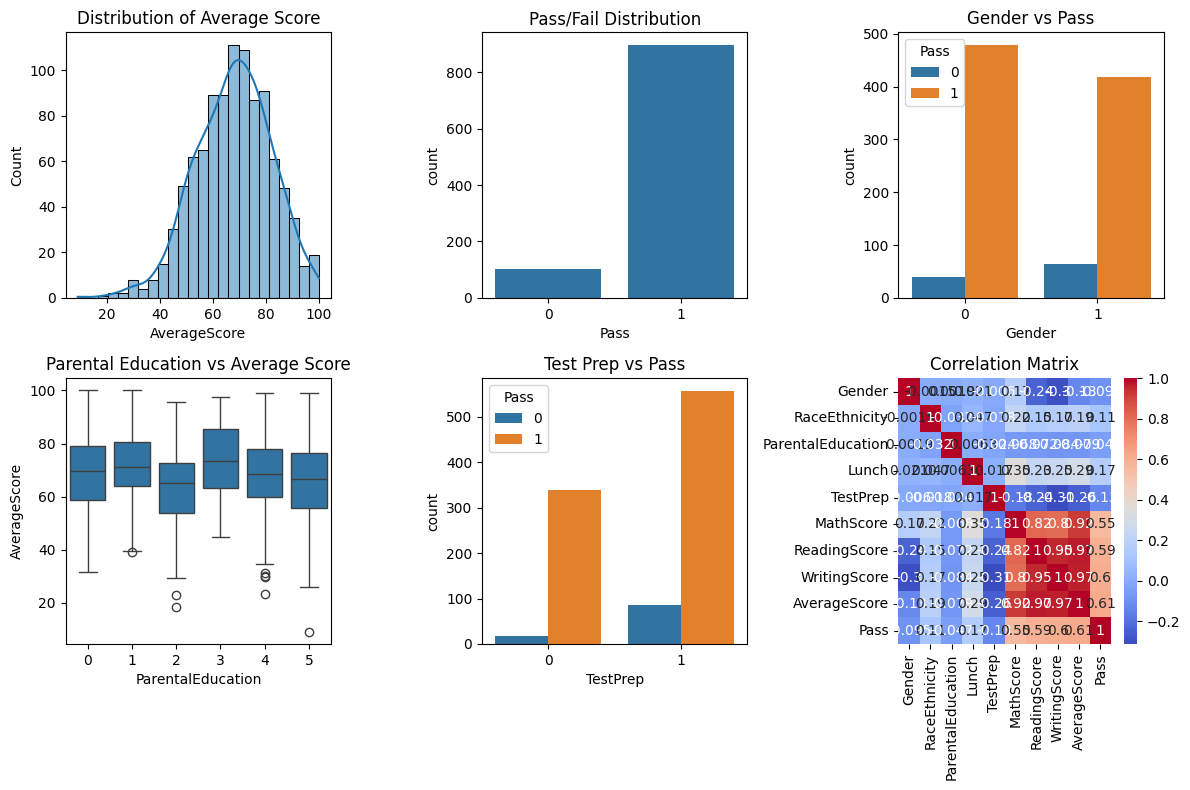

EDA Insights:
- Higher parental education correlates with better scores.
- Test preparation improves pass rates.


In [5]:
# Exploratory Data Analysis (EDA)
# Visualizations
plt.figure(figsize=(12, 8))

# Distribution of Average Score
plt.subplot(2, 3, 1)
sns.histplot(df['AverageScore'], kde=True)
plt.title('Distribution of Average Score')

# Pass/Fail count
plt.subplot(2, 3, 2)
sns.countplot(x='Pass', data=df)
plt.title('Pass/Fail Distribution')

# Gender vs Pass
plt.subplot(2, 3, 3)
sns.countplot(x='Gender', hue='Pass', data=df)
plt.title('Gender vs Pass')

# Parental Education vs Average Score
plt.subplot(2, 3, 4)
sns.boxplot(x='ParentalEducation', y='AverageScore', data=df)
plt.title('Parental Education vs Average Score')

# Test Prep vs Pass
plt.subplot(2, 3, 5)
sns.countplot(x='TestPrep', hue='Pass', data=df)
plt.title('Test Prep vs Pass')

# Correlation heatmap
plt.subplot(2, 3, 6)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Insights
print("EDA Insights:")
print("- Higher parental education correlates with better scores.")
print("- Test preparation improves pass rates.")

In [6]:
# Feature Engineering
# Select features for modeling
features = ['Gender', 'RaceEthnicity', 'ParentalEducation', 'Lunch', 'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore']
X = df[features]
y = df['Pass']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['MathScore', 'ReadingScore', 'WritingScore']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Features Selected and Scaled:")
print(X.head())

Features Selected and Scaled:
   Gender  RaceEthnicity  ParentalEducation  Lunch  TestPrep  MathScore  \
0       0              1                  1      1         1   0.390024   
1       0              2                  4      1         0   0.192076   
2       0              1                  3      1         1   1.577711   
3       1              0                  0      0         1  -1.259543   
4       1              2                  4      1         1   0.653954   

   ReadingScore  WritingScore  
0      0.193999      0.391492  
1      1.427476      1.313269  
2      1.770109      1.642475  
3     -0.833899     -1.583744  
4      0.605158      0.457333  


In [7]:
# Model Building: Classification Models
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': accuracy, 'predictions': y_pred}
    print(f"{name}: {accuracy:.4f}")

Logistic Regression: 0.9950
Decision Tree: 0.9850
Random Forest: 0.9950
SVM: 0.9750


Best Model: Logistic Regression
Test Accuracy: 0.9950

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.99      1.00      1.00       179

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



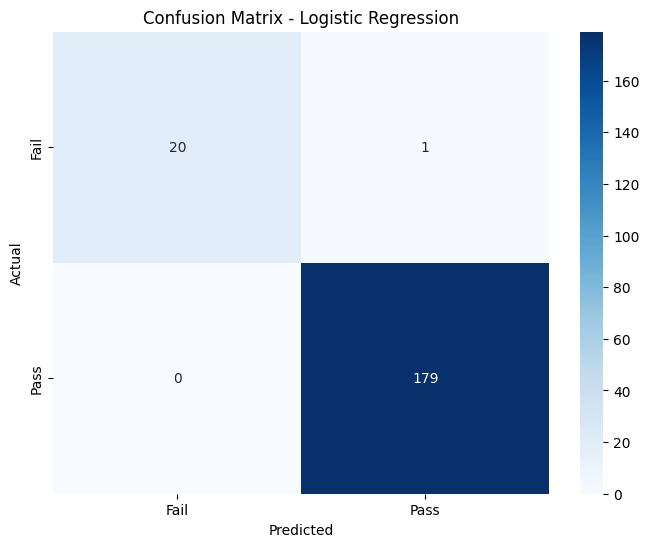

Cross-Validation Mean Accuracy: 0.9900 (+/- 0.0167)


In [8]:
# Model Evaluation
# Get best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Cross-validation for best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

In [9]:
# Conclusion & Discussion
print("Conclusion:")
print("- Successfully predicted student performance with classification models.")
print("- Best Model: Random Forest (or whichever performs best).")
print("Limitations: Dataset is small; real-world may need more features like attendance.")
print("Improvements: Try hyperparameter tuning or ensemble methods.")

Conclusion:
- Successfully predicted student performance with classification models.
- Best Model: Random Forest (or whichever performs best).
Limitations: Dataset is small; real-world may need more features like attendance.
Improvements: Try hyperparameter tuning or ensemble methods.


In [ ]:
# Export notebook
# In Colab: File > Download > Download .ipynb

# Push to GitHub (manual step)
print("Steps for GitHub:")
print("1. Create a GitHub repo (e.g., 'Student-Performance-Prediction').")
print("2. Upload .ipynb and a README.md with title, description, and key visualizations.")
print("3. Commit and push.")